# Example 3: Galaxy-galaxy lensing 

In this example, we'll show how to calculate $\Delta\Sigma(r),$ the galaxy-galaxy lensing signal of a mock catalog.  

In [8]:
#from halotools.empirical_models import PrebuiltSubhaloModelFactory
#model = PrebuiltSubhaloModelFactory('behroozi10')

#from halotools.sim_manager import CachedHaloCatalog
#halocat = CachedHaloCatalog(simname='chinchilla', redshift=0.2, halo_finder='rockstar', version_name = 'Lb400-2048',\
                           #dz_tol = 0.01, ptcl_version_name = 'Lb400-2048')
#model.populate_mock(halocat)

#imports
from glob import glob
from os import path
import numpy as np
from halotools.sim_manager import CachedHaloCatalog, RockstarHlistReader, UserSuppliedPtclCatalog
from helpers.readGadgetSnapshot import readGadgetSnapshot
from AbundanceMatching import *

In [9]:
#definitions for creation of catalog
simname = 'chinchilla'
Lbox = 400
npart = 2048
z = 0.2
a = 1/(1+z)
halo_finder = 'rockstar'
pmass = 1.44390e+08*((Lbox / 125.0) ** 3) * ((1024.0/npart)** 3)
version_name = 'Lb400-2048'

In [10]:
#manually create halo catalog
from astropy.table import Table
path_to_cache_local = '/Users/kipac-slac-loaner/Git/desiDeltaSigma/hlist_0.83.list.chinchilla_Lb400-2048.hdf5'
t = Table.read(path_to_cache_local,  format='hdf5')
from halotools.sim_manager import UserSuppliedHaloCatalog
d = dict(zip(t.colnames, (t[n] for n in t.colnames)))
halo_catalog = UserSuppliedHaloCatalog(redshift=z, Lbox=Lbox, particle_mass=pmass, **d)
halo_cache_fname = './halo_cache.hdf5'
halocat = halo_catalog

In [11]:
#time to trim
galaxy_magnitudes = np.genfromtxt('gama_matched_catalog.npy')
downsample_idxs = np.genfromtxt('gama_matched_catalog_idxs.npy')

In [12]:
downsample_idxs = downsample_idxs.astype(int)

In [13]:
#do the downsampling 
galaxy_magnitudes = galaxy_magnitudes[downsample_idxs]

Predictions for galaxy-galaxy lensing are calculated from the cross-correlation between the galaxy positions and the dark matter density field. For the latter, we will use the dark patter particle positions stored in the `ptcl_table` attribute of the mock.

In [14]:
path_to_particles = '/Users/kipac-slac-loaner/Git/desiDeltaSigma/ptcl_catalog.npy' #update
all_particles = np.loadtxt(path_to_particles)
version_name = 'Lb%d-%d' % (int(Lbox), npart)
ptclcat = UserSuppliedPtclCatalog(redshift=z, Lbox=Lbox, particle_mass=pmass,\
                                       x=all_particles[:,0], y=all_particles[:,1], z=all_particles[:,2])
ptcl_cache_loc ='/Users/kipac-slac-loaner/Git/desiDeltaSigma/ptcl_cache_loc.hdf5' #update
ptcl_cache_filename = ptcl_cache_loc # make sure we don't have redunancies.
p=1e-3
#ptcl_catalog.add_ptclcat_to_cache(ptcl_cache_filename, simname, version_name, 'p=%f'%p)


In [15]:
import h5py 
ptcl_cat='/Users/kipac-slac-loaner/Git/desiDeltaSigma/ptcl_0.83.list.chinchilla_Lb400-2048.hdf5'
pf = h5py.File(ptcl_cat)

In [16]:
pdataset = pf['data']
px = pdataset['x']
py = pdataset['y']
pz = pdataset['z']

(array([[  8021.,   7710.,   6836., ...,   9484.,   8027.,   8139.],
        [  9670.,   7784.,   9126., ...,  16225.,   9227.,   7967.],
        [ 10699.,   9378.,  12588., ...,  16042.,   6939.,   8779.],
        ..., 
        [ 10850.,   8626.,   7856., ...,   8202.,   8741.,   8020.],
        [ 11121.,   9509.,  16394., ...,   6994.,   6493.,  12774.],
        [ 12603.,   6257.,   8339., ...,   6512.,   6275.,   6758.]]),
 array([   0.        ,    3.99999976,    7.99999952,   11.99999905,
          15.99999905,   19.99999809,   23.99999809,   27.99999809,
          31.99999809,   35.99999619,   39.99999619,   43.99999619,
          47.99999619,   51.99999619,   55.99999619,   59.99999619,
          63.99999619,   67.99999237,   71.99999237,   75.99999237,
          79.99999237,   83.99999237,   87.99999237,   91.99999237,
          95.99999237,   99.99999237,  103.99999237,  107.99999237,
         111.99999237,  115.99999237,  119.99999237,  123.99999237,
         127.99999237,  13

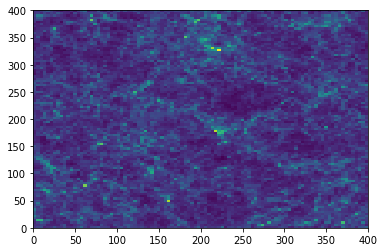

In [29]:
plt.hist2d(px, py, 100)

(array([[  9881.,   7697.,   6735., ...,   7474.,   8112.,  11006.],
        [  8309.,   7597.,   9476., ...,   7942.,  10479.,  12939.],
        [ 10677.,   6876.,  10567., ...,   8115.,  10488.,  12473.],
        ..., 
        [ 10932.,   8614.,   8545., ...,   7176.,  10509.,   9382.],
        [  9308.,  12098.,   7832., ...,   6372.,   7778.,   8451.],
        [  9728.,   9038.,   7888., ...,  11531.,   7358.,  10978.]]),
 array([   0.        ,    3.99999976,    7.99999952,   11.99999905,
          15.99999905,   19.99999809,   23.99999809,   27.99999809,
          31.99999809,   35.99999619,   39.99999619,   43.99999619,
          47.99999619,   51.99999619,   55.99999619,   59.99999619,
          63.99999619,   67.99999237,   71.99999237,   75.99999237,
          79.99999237,   83.99999237,   87.99999237,   91.99999237,
          95.99999237,   99.99999237,  103.99999237,  107.99999237,
         111.99999237,  115.99999237,  119.99999237,  123.99999237,
         127.99999237,  13

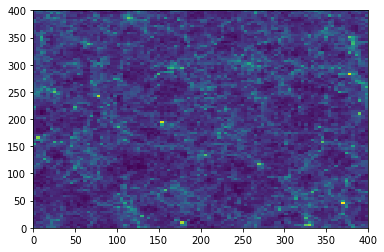

In [30]:
plt.hist2d(py, pz, 100)

(array([[  8297.,   6855.,   7042., ...,  11487.,   8400.,  12530.],
        [ 11773.,   7009.,   7724., ...,   7504.,   6476.,   6504.],
        [  6617.,   9129.,  20575., ...,   8130.,  10315.,   6318.],
        ..., 
        [  8458.,   8170.,  12677., ...,   9173.,  12347.,   9868.],
        [  8951.,  10525.,  10104., ...,  11009.,  15005.,  12751.],
        [  6891.,   7592.,  12033., ...,  20561.,  20513.,   8248.]]),
 array([   0.        ,    3.99999976,    7.99999952,   11.99999905,
          15.99999905,   19.99999809,   23.99999809,   27.99999809,
          31.99999809,   35.99999619,   39.99999619,   43.99999619,
          47.99999619,   51.99999619,   55.99999619,   59.99999619,
          63.99999619,   67.99999237,   71.99999237,   75.99999237,
          79.99999237,   83.99999237,   87.99999237,   91.99999237,
          95.99999237,   99.99999237,  103.99999237,  107.99999237,
         111.99999237,  115.99999237,  119.99999237,  123.99999237,
         127.99999237,  13

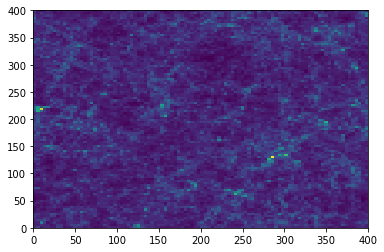

In [31]:
plt.hist2d(pz, px, 100)

In [17]:
#px = ptclcat.ptcl_table['x']
#py = ptclcat.ptcl_table['y']
#pz = ptclcat.ptcl_table['z']
import numpy as np
from halotools.mock_observables import return_xyz_formatted_array

Nptcls_to_keep = int(5e4)
randomizer = np.random.random(len(px))
sorted_randoms = np.sort(randomizer)
ptcl_mask = np.where(sorted_randoms < sorted_randoms[Nptcls_to_keep])[0]
particle_positions = return_xyz_formatted_array(px, py, pz, mask = ptcl_mask)

Now we will extract the *x, y, z* positions of various subsamples of our galaxies 

In [18]:
#take them from our SHAM, not the mock
magnitude_cut1 = galaxy_magnitudes < -19
magnitude_cut2 = galaxy_magnitudes < -20
magnitude_cut3 = galaxy_magnitudes < -21
magnitude_cut4 = galaxy_magnitudes < -22

x1 = halocat.halo_table['halo_x'][downsample_idxs][magnitude_cut1]
y1 = halocat.halo_table['halo_y'][downsample_idxs][magnitude_cut1]
z1 = halocat.halo_table['halo_z'][downsample_idxs][magnitude_cut1]

x2 = halocat.halo_table['halo_x'][downsample_idxs][magnitude_cut2]
y2 = halocat.halo_table['halo_y'][downsample_idxs][magnitude_cut2]
z2 = halocat.halo_table['halo_z'][downsample_idxs][magnitude_cut2]

x3 = halocat.halo_table['halo_x'][downsample_idxs][magnitude_cut3]
y3 = halocat.halo_table['halo_y'][downsample_idxs][magnitude_cut3]
z3 = halocat.halo_table['halo_z'][downsample_idxs][magnitude_cut3]

x4 = halocat.halo_table['halo_x'][downsample_idxs][magnitude_cut4]
y4 = halocat.halo_table['halo_y'][downsample_idxs][magnitude_cut4]
z4 = halocat.halo_table['halo_z'][downsample_idxs][magnitude_cut4]

In [19]:
#turn it into an array
all_positions1 = return_xyz_formatted_array(x1,y1,z1)
all_positions2 = return_xyz_formatted_array(x2,y2,z2)
all_positions3 = return_xyz_formatted_array(x3,y3,z3)
all_positions4 = return_xyz_formatted_array(x4,y4,z4)

In [20]:
from halotools.mock_observables import delta_sigma

rp_bins = np.logspace(-1,1,15)

particle_masses = halocat.particle_mass
period=halocat.Lbox[0]
#downsampling_factor = (halocat.num_ptcl_per_dim**3)/float(len(particle_positions))
downsampling_factor = Nptcls_to_keep

In [21]:
from astropy import cosmology
cosmo =  cosmology.core.LambdaCDM(H0=100 * 0.7, Om0=0.286, Ode0=0.714)

In [22]:
rp, result_all_in_mpc1 = delta_sigma(all_positions1, particle_positions, 
                                     particle_masses, downsampling_factor,
                                    rp_bins, period, cosmology= cosmo, num_threads='max')
rp, result_all_in_mpc2 = delta_sigma(all_positions2, particle_positions, 
                                     particle_masses, downsampling_factor,
                                    rp_bins, period, cosmology= cosmo, num_threads='max')
rp, result_all_in_mpc3 = delta_sigma(all_positions3, particle_positions, 
                                     particle_masses, downsampling_factor,
                                    rp_bins, period, cosmology= cosmo, num_threads='max')
rp, result_all_in_mpc4 = delta_sigma(all_positions4, particle_positions, 
                                     particle_masses, downsampling_factor,
                                    rp_bins, period, cosmology= cosmo, num_threads='max')

In [23]:
length_unit_conversion = 1e6
result_all_in_pc1 = result_all_in_mpc1/length_unit_conversion**2
result_all_in_pc2 = result_all_in_mpc2/length_unit_conversion**2
result_all_in_pc3 = result_all_in_mpc3/length_unit_conversion**2
result_all_in_pc4 = result_all_in_mpc4/length_unit_conversion**2

In [24]:
from matplotlib import pyplot as plt
%matplotlib inline

(array([  1.00000000e-02,   1.00000000e-01,   1.00000000e+00,
          1.00000000e+01,   1.00000000e+02,   1.00000000e+03,
          1.00000000e+04]), <a list of 7 Text yticklabel objects>)

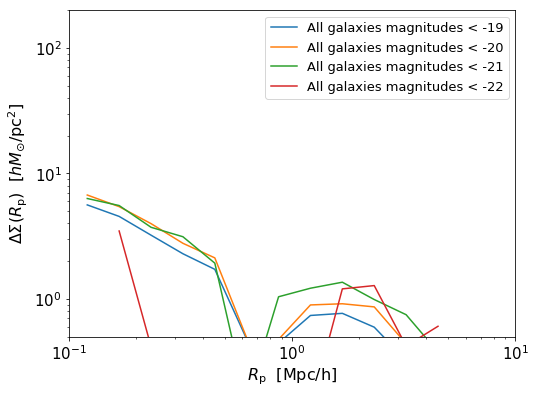

In [25]:
#plot it
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

__=plt.loglog()

__=ax.plot(rp, result_all_in_pc1, label=r'All galaxies magnitudes < -19')
__=ax.plot(rp, result_all_in_pc2, label=r'All galaxies magnitudes < -20')
__=ax.plot(rp, result_all_in_pc3, label=r'All galaxies magnitudes < -21')
__=ax.plot(rp, result_all_in_pc4, label=r'All galaxies magnitudes < -22')

__=ax.set_xlim(xmin = 0.1, xmax = 10)
__=ax.set_ylim(ymin = 0.5, ymax = 200)

__=ax.set_xlabel(r'$R_{\rm p} $  $\rm{[Mpc / h]}$', fontsize=16)
__=ax.set_ylabel(r'$\Delta\Sigma(R_{\rm p})$  $[h M_{\odot} / {\rm pc}^2]$', fontsize=16)
__=ax.legend(loc='best', fontsize=13)
__=plt.xticks(fontsize=15); plt.yticks(fontsize=15) 
